In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import random
from scipy.spatial import distance

In [2]:
points=[(1,1),(1,2),(2,1),(2,3),(4,0),(4,1),(5,1),(5,3),(6,6),(6,7),(7,6),(7,5)]

In [ ]:
x=[i[0] for i in points]
y=[i[1] for i in points]

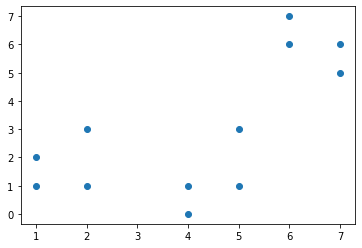

In [ ]:
plt.scatter(x,y)

# Step - 1
    Intialization

# Step - 2
    Finding Distance between Centroid and other points

# step - 3

Please insert K=3
Intial_Centroid-> [(4, 0), (5, 3), (1, 2)]
New_Centroid-> [(4.5, 1.25), (6.5, 6.0), (1.5, 1.75)]


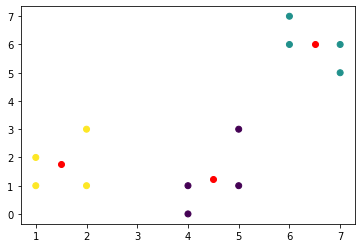

In [ ]:
def my_kmean(points,k,num_iter=100):
    Intial_Centroid=random.sample(points,k)
    print("Intial_Centroid->",Intial_Centroid)
    New_Centroid=Intial_Centroid
    for i in range(num_iter):
        #num_iter time check
        New_Cluster=[]
        for i in points:
            c=[]
            for j in New_Centroid:
                dist = distance.euclidean(i, j)
                c.append(dist)
            New_Cluster.append(c.index(min(c)))
        temp=[]
        for i in range(k):
            x_sum=0
            y_sum=0
            count=0
            for index,j in enumerate(New_Cluster):
                if i==j:
                    count+=1
                    x_sum+=points[index][0]
                    y_sum+=points[index][1]
            if count>0:
                temp.append(((x_sum/count),(y_sum/count)))
        if(New_Centroid.cmp(temp) == 0):
            print("Completed Clustering")
            break # complete the loop
        else:
            New_Centroid=temp
    plot_fun()   

In [ ]:
def plot_fun():
    print("New_Centroid->",New_Centroid)  
    x=[i[0] for i in points]
    y=[i[1] for i in points]
    c_x=[i[0] for i in New_Centroid]
    c_y=[i[1] for i in New_Centroid]
    plt.scatter(x,y,c=New_Cluster)
    plt.scatter(c_x,c_y,c="red")

In [ ]:
k=int(input("Please insert K="))

In [ ]:
# If not satisfied run again problem due to choosing random centroid

In [3]:
import numpy as np

In [ ]:
x = np.array([[1,2],[2,3],[3,4],[6,7]])
c = np.array([[1,2],[3,4]])

In [ ]:
x.shape, c.shape

((4, 2), (2, 2))

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
cdist(x,c)

array([[0.        , 2.82842712],
       [1.41421356, 1.41421356],
       [2.82842712, 0.        ],
       [7.07106781, 4.24264069]])

In [4]:
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
pairwise_distances_argmin_min(x,c)

(array([0, 0, 1, 1], dtype=int64),
 array([0.        , 1.41421356, 0.        , 4.24264069]))

In [5]:
def my_kmean(X,k,num_iter=100):
    X = np.array(X)
#     Intial_Centroid=random.sample(X,k)
    Intial_Centroid = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    
    print("Intial_Centroid->",Intial_Centroid)
    New_Centroid=Intial_Centroid
    for i in range(num_iter):
        print("#################   ",i , "th Iteration")
        min_clust_no, min_dist = pairwise_distances_argmin_min(X,New_Centroid)
        print(min_clust_no)
        n_values = np.max(min_clust_no) + 1
        cluster_per_member = np.eye(n_values)[min_clust_no]
        s_list = np.zeros(X.shape)
        list_means = []
        for col in cluster_per_member.T:
            m = np.logical_not(col)
            m = m.reshape(len(col),1)
            m= np.broadcast_to(m,(len(col),X.shape[1]))
            selected_points = np.ma.masked_array(X, m)
            mean = selected_points.mean(axis=0)
            print("Centroids are")
            print(mean)
            list_means.append(list(mean.data))
            
        print(list_means)
        list_means = np.array(list_means)
        assigned_cluster_no = min_clust_no
        if str(list_means) == str(New_Centroid):
            print("Clustering completed!!")
            break
        else:
            New_Centroid = list_means
    return assigned_cluster_no, New_Centroid

In [6]:
def plot_fun(X,assigned_cluster_no, New_Centroid):
    print("New_Centroid->",New_Centroid)  
    x=[i[0] for i in X]
    y=[i[1] for i in X]
    c_x=[i[0] for i in New_Centroid]
    c_y=[i[1] for i in New_Centroid]
    plt.scatter(x,y,c=assigned_cluster_no)
    plt.scatter(c_x,c_y,c="red")

In [7]:
X=[(1,1),(1,2),(2,1),(2,3),(4,0),(4,1),(5,1),(5,3),(6,6),(6,7),(7,6),(7,5)]

In [8]:
assigned_cluster_no, New_Centroid = my_kmean(X,3,num_iter=100)

Intial_Centroid-> [[7 6]
 [4 0]
 [2 1]]
#################    0 th Iteration
[2 2 2 2 1 1 1 1 0 0 0 0]
Centroids are
[6.5 6.0]
Centroids are
[4.5 1.25]
Centroids are
[1.5 1.75]
[[6.5, 6.0], [4.5, 1.25], [1.5, 1.75]]
#################    1 th Iteration
[2 2 2 2 1 1 1 1 0 0 0 0]
Centroids are
[6.5 6.0]
Centroids are
[4.5 1.25]
Centroids are
[1.5 1.75]
[[6.5, 6.0], [4.5, 1.25], [1.5, 1.75]]
Clustering completed!!


New_Centroid-> [[6.5  6.  ]
 [4.5  1.25]
 [1.5  1.75]]


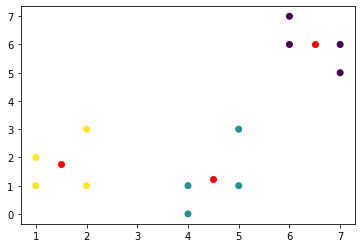

In [9]:
plot_fun(X,assigned_cluster_no, New_Centroid)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


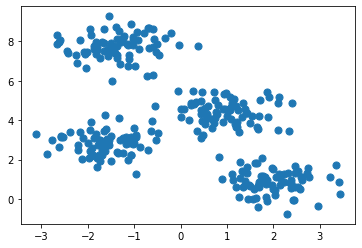

In [10]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, \
                       centers=4,\
                       cluster_std=0.60,\
                       random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [13]:
assigned_cluster_no, New_Centroid = my_kmean(X,4,num_iter=500)

Intial_Centroid-> [[ 0.78933856  4.33748653]
 [-1.31454942  6.83904013]
 [-1.39346767  8.74641672]
 [-1.63793622  2.43329317]]
#################    0 th Iteration
[0 1 0 2 0 0 3 0 2 2 3 2 0 1 3 0 0 0 3 3 0 0 0 3 3 0 0 0 3 0 2 1 0 1 2 1 1
 2 3 3 0 3 0 0 3 3 2 3 1 0 3 0 1 0 0 3 1 3 1 3 1 0 2 3 3 3 1 0 2 3 0 3 2 3
 3 2 3 0 0 2 3 0 3 0 2 0 0 0 1 1 0 0 2 3 3 0 0 0 0 3 2 3 1 0 0 0 0 0 1 0 3
 3 3 2 0 0 1 3 0 0 3 3 3 3 0 0 3 3 3 3 2 3 3 0 1 3 3 1 0 1 2 3 0 3 0 3 1 0
 1 1 2 0 1 0 3 3 2 3 0 0 2 0 0 0 0 3 3 0 0 0 0 2 3 0 3 2 0 0 0 3 0 0 3 3 0
 0 0 0 0 1 0 3 0 0 3 3 3 0 3 2 0 3 3 3 0 1 3 2 0 1 0 3 0 0 1 3 3 0 0 0 1 0
 0 3 3 3 0 1 2 0 0 2 0 3 3 0 0 3 2 3 0 0 0 1 1 1 2 3 3 1 0 3 3 0 3 3 0 3 0
 1 0 0 3 3 2 3 0 1 0 0 3 3 3 0 0 3 0 0 2 2 0 0 0 0 0 0 1 3 2 0 3 0 1 2 2 0
 0 0 1 3]
Centroids are
[1.4408875421018426 3.051316581450002]
Centroids are
[-1.3870042848149267 7.300701300861393]
Centroids are
[-1.3583369814145427 8.244425068687223]
Centroids are
[-0.859160778199525 2.250011241401389]
[[1.440887542

New_Centroid-> [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


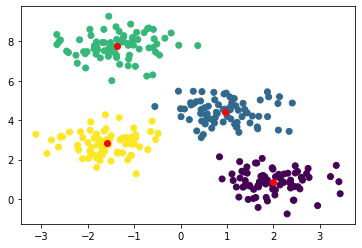

In [14]:
plot_fun(X,assigned_cluster_no, New_Centroid)